In [12]:
import matplotlib.pyplot as plt
import json

In [31]:
with open('out\\rope600\\train_logs.json') as f:
    data = json.load(f)
    print(data.keys())

dict_keys(['train_losses', 'attention_computation_time', 'attention_computation_memory'])


In [13]:
with open('out\\rope600\\train_logs.json') as f:
    data = json.load(f)
rope600_loss = data['train_losses']
with open('out\\rope800\\train_logs.json') as f:
    data = json.load(f)
rope800_loss = data['train_losses']
with open('out\\vanilla600\\train_logs.json') as f:
    data = json.load(f)    
vanilla600_loss = data['train_losses']
with open('out\\vanilla800\\train_logs.json') as f:
    data = json.load(f)
vanilla800_loss = data['train_losses']


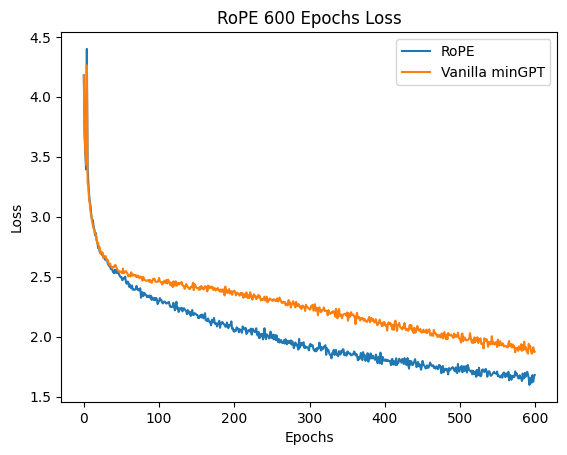

In [40]:
fig, ax = plt.subplots(1)
ax.plot(rope600_loss, label = 'RoPE')
ax.plot(vanilla600_loss, label = 'Vanilla minGPT')
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('RoPE 600 Epochs Loss')
fig.savefig('../latex_template/fig/4_1.png')
plt.show(fig)

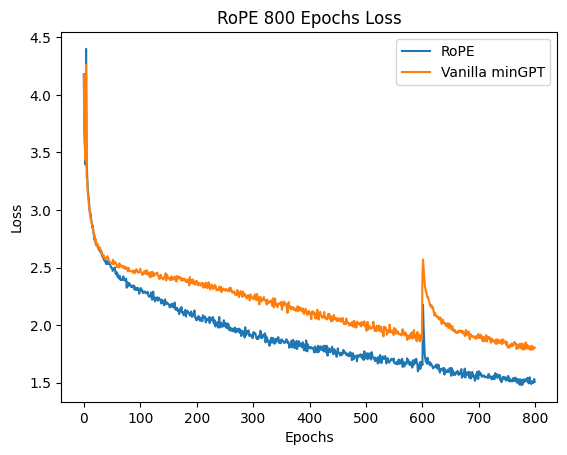

In [41]:
fig, ax = plt.subplots(1)
ax.plot(rope600_loss+rope800_loss, label = 'RoPE')
ax.plot(vanilla600_loss+vanilla800_loss, label = 'Vanilla minGPT')
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('RoPE 800 Epochs Loss')
fig.savefig('../latex_template/fig/4_2.png')
plt.show(fig)

GQA

In [17]:
with open('out\\gqa_1\\train_logs.json') as f:
    gqa1 = json.load(f)
with open('out\\gqa_2\\train_logs.json') as f:
    gqa2 = json.load(f)
with open('out\\gqa_3\\train_logs.json') as f:
    gqa3 = json.load(f)    
with open('out\\gqa_6\\train_logs.json') as f:
    gqa6 = json.load(f)

In [27]:
from numpy import mean
avg_comp_times = [mean(gqa1['attention_computation_time'][1:]),
                  mean(gqa2['attention_computation_time'][1:]),
                  mean(gqa3['attention_computation_time'][1:]),
                  mean(gqa6['attention_computation_time'][1:])]

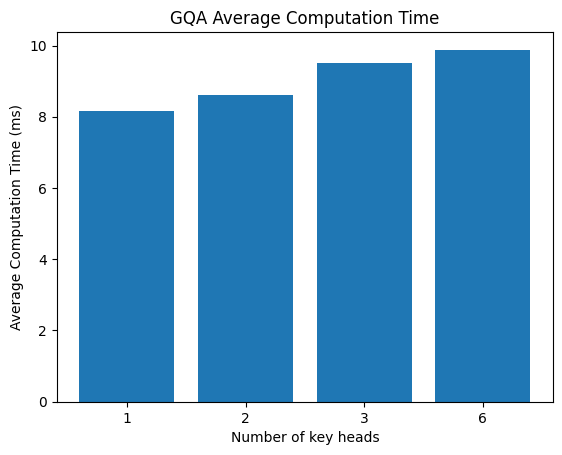

In [28]:
fig,ax = plt.subplots(1)
ax.bar(range(4), avg_comp_times)
ax.set_xticks(range(4),labels = ['1','2','3','6'])
ax.set_xlabel('Number of key heads')
ax.set_ylabel('Average Computation Time (ms)')
ax.set_title('GQA Average Computation Time')
plt.show(fig)

In [35]:
avg_comp_memory = [mean(gqa1['attention_computation_memory']),
                  mean(gqa2['attention_computation_memory']),
                  mean(gqa3['attention_computation_memory']),
                  mean(gqa6['attention_computation_memory'])]

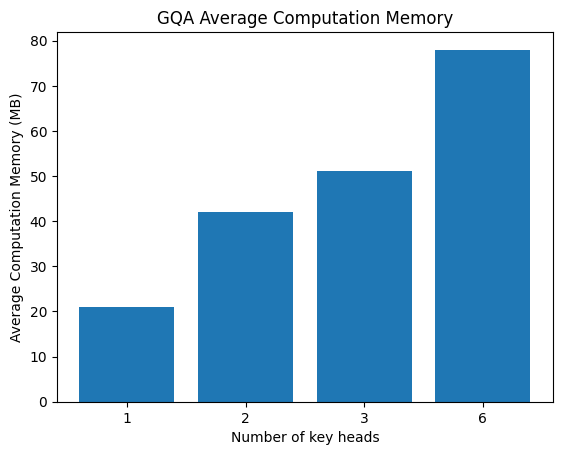

In [37]:
fig,ax = plt.subplots(1)
ax.bar(range(4), avg_comp_memory)
ax.set_xticks(range(4),labels = ['1','2','3','6'])
ax.set_xlabel('Number of key heads')
ax.set_ylabel('Average Computation Memory (MB)')
ax.set_title('GQA Average Computation Memory')
plt.show(fig)

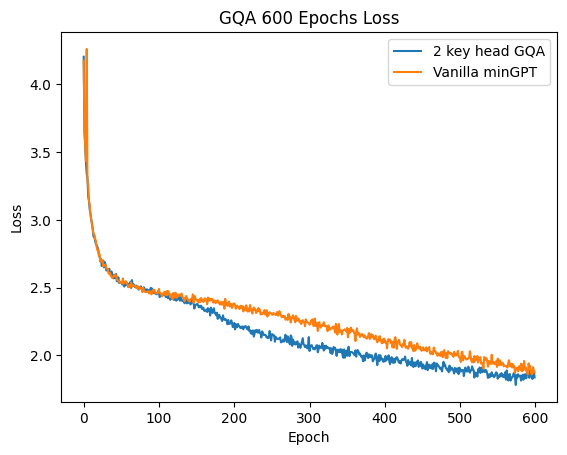

In [39]:
fig,ax = plt.subplots(1)
ax.plot(gqa2['train_losses'], label = '2 key head GQA')
ax.plot(vanilla600_loss, label = 'Vanilla minGPT')
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('GQA 600 Epochs Loss')
plt.show(fig)